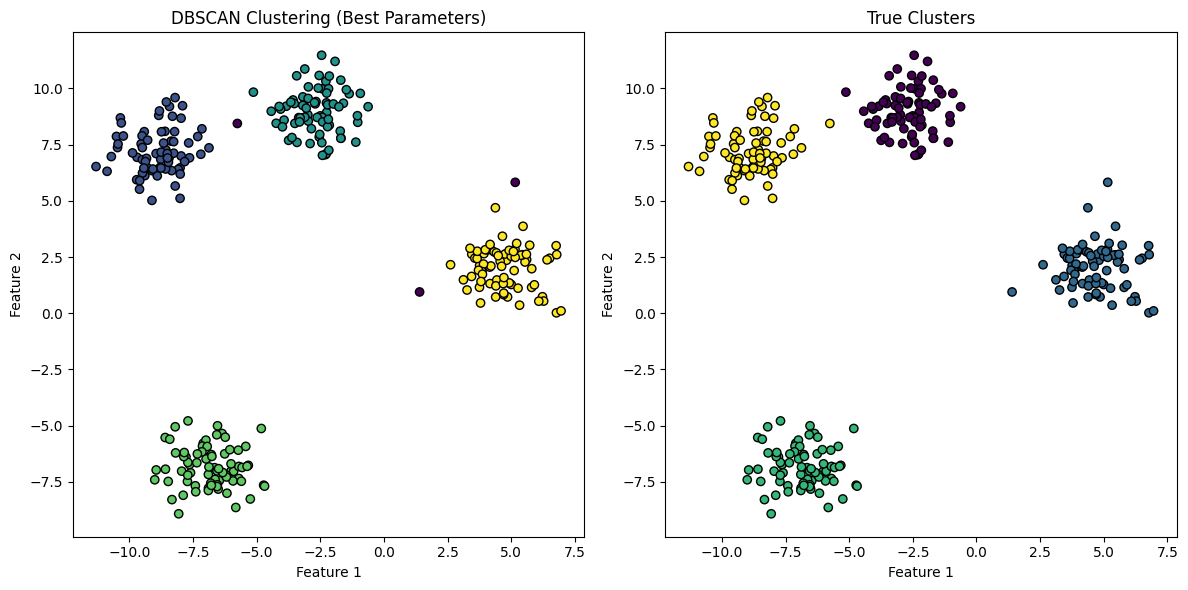

Best Epsilon: 1.3000000000000003
Best Min Samples: 5
Best Silhouette Score: 0.7601161877829116
Best Adjusted Rand Index (ARI): 0.9866229538326855


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score

# fix the random seed for reproducibility
np.random.seed(42)

# generate synthetic data with 2 features for easy visualization
# the number of clusters (centers) is chosen randomly between 2 and 5
n_features = 2
n_centers = np.random.randint(2, 6)
X, y = make_blobs(n_samples=300, n_features=n_features, centers=n_centers, random_state=42)

# initialize the best score and parameters to invalid values
best_silhouette_score = -1
best_ari = -1
best_epsilon = 0
best_min_samples = 0
best_labels = None

# grid search over a range of epsilon and min_samples values to maximize the silhouette score
# restrict the percentage of outliers to a maximum of 1 percent
for epsilon in np.arange(0.1, 2.0, 0.1):
    for min_samples in range(5, 20):
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        # calculate the silhouette score only if the number of outliers is within the desired limit
        if (np.sum(labels == -1) / len(labels)) <= 0.01:
            # ensure we have at least 2 clusters before computing the silhouette score
            if len(set(labels)) - (1 if -1 in labels else 0) > 1:
                silhouette_avg = silhouette_score(X, labels)
                ari = adjusted_rand_score(y, labels)
                # update best parameters if the current silhouette score is better
                if silhouette_avg > best_silhouette_score:
                    best_silhouette_score = silhouette_avg
                    best_ari = ari
                    best_epsilon = epsilon
                    best_min_samples = min_samples
                    best_labels = labels

# visualize the dbscan clustering results with the best parameters
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis', edgecolors='k')
plt.title('DBSCAN Clustering (Best Parameters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('True Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# print the best parameters and scores for reference
print(f"Best Epsilon: {best_epsilon}")
print(f"Best Min Samples: {best_min_samples}")
print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Best Adjusted Rand Index (ARI): {best_ari}")



we see that epsilion is 1.3 and fewest number of points required to form a cluster is 5, and the  silhouette score was 0.76 which means that structe was found adn clusters are seperated very well. The adjusted rand index is 0.98 meaning matching with true labels. And the graphs show that really the DBSCAN mathces with the actual clusters